In [2]:
import matplotlib.pyplot as plt
import numpy as np

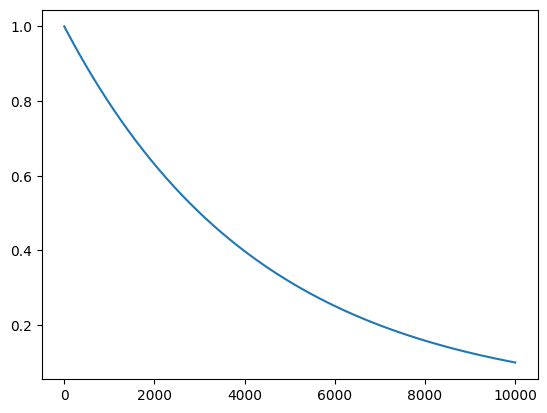

In [9]:
state = [1.0]
for i in range(10000):
    state.append(state[-1] * (0.1/1)**(1/10000))
plt.plot(state)

In [1]:
import tools
corpus = tools.load_corpus()
from importlib import reload as rl
import non_iid_dataloader as niiddl, lhotse
partition = niiddl.prepare_partition(corpus['train'])
from tqdm import tqdm
from torch.nn import TransformerDecoder, TransformerDecoderLayer, Transformer
import torch
import x_transformers, torch
tk = tools.load_tokenizer()
from omegaconf.omegaconf import OmegaConf
%cd tedlium
import lm_utils
tokenizer = tk

[NeMo W 2022-10-31 00:32:10 optimizers:55] Apex was not found. Using the lamb or fused_adam optimizer will error out.
[NeMo W 2022-10-31 00:32:12 experimental:27] Module <class 'nemo.collections.nlp.data.language_modeling.megatron.megatron_batch_samplers.MegatronPretrainingRandomBatchSampler'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-10-31 00:32:12 experimental:27] Module <class 'nemo.collections.nlp.models.text_normalization_as_tagging.thutmose_tagger.ThutmoseTaggerModel'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-10-31 00:32:12 nemo_logging:349] /exp/exp1/acp21rjf/lhotse/lhotse/lazy.py:388: UserWarning: A lambda was passed to LazyMapper: it may prevent you from forking this process. If you experience issues with num_workers > 0 in torch.utils.data.DataLoader, try passing a regular function instead.
      warnings.warn(
    


[Errno 2] No such file or directory: 'tedlium'
/exp/exp1/acp21rjf/deliberation/speachy/tedlium


In [2]:
meetings = niiddl.prepare_partition(corpus['train'])

In [3]:
import lhotse
import non_iid_dataloader as niiddl
rl(niiddl),rl(lhotse)
from lhotse.dataset.collation import collate_audio
from lhotse.dataset.cut_transforms import plain_concat, individual_speaker_concat
niiddl.plain_concat = plain_concat
niiddl.individual_speaker_concat = individual_speaker_concat

samples = niiddl.prepare_samples(meetings, max_allowed_utterance_gap=3.0, max_duration=100)


In [4]:
rl(tools)
print(torch.cuda.is_available())

True


In [5]:
import model_utils
class argsclass:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [6]:
rl(lm_utils)
model = lm_utils.load_model(lm_utils.load_config('./lm/decoder_test.yaml'), tools.load_tokenizer(), max_len=1862)

In [23]:
model.to('cpu')

transformer_lm(
  (layers): transformer(
    (positional_bias): DynamicPositionBias(
      (mlp): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=1, out_features=64, bias=True)
          (1): Identity()
          (2): ReLU()
        )
        (1): Sequential(
          (0): Linear(in_features=64, out_features=64, bias=True)
          (1): Identity()
          (2): ReLU()
        )
        (2): Linear(in_features=64, out_features=8, bias=True)
      )
    )
    (layers): ModuleList(
      (0): ModuleList(
        (0): PreNorm(
          (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (fn): MyopicAttention(
            (qkv_proj): Linear(in_features=256, out_features=768, bias=False)
            (out_proj): Linear(in_features=256, out_features=256, bias=False)
          )
        )
        (1): PreNorm(
          (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (fn): Sequential(
            (0): GLU(
              (act

In [7]:
!ls checkpoints_LM3

ls: cannot access 'checkpoints_LM3': No such file or directory


In [8]:
rl(lm_utils), rl(model_utils)

(<module 'lm_utils' from '/exp/exp1/acp21rjf/deliberation/speachy/tedlium/lm_utils.py'>,
 <module 'model_utils' from '/exp/exp1/acp21rjf/deliberation/speachy/tedlium/model_utils.py'>)

In [9]:
epoch, val_loss  = model_utils.load_checkpoint(args=argsclass(**{'checkpoint': './checkpoint_myopic_test/checkpoint_11_id_18.pt'}), model=model, force_cpu=True)

./checkpoint_myopic_test/checkpoint_11_id_18.pt
odict_keys(['layers.positional_bias.mlp.0.0.weight', 'layers.positional_bias.mlp.0.0.bias', 'layers.positional_bias.mlp.1.0.weight', 'layers.positional_bias.mlp.1.0.bias', 'layers.positional_bias.mlp.2.weight', 'layers.positional_bias.mlp.2.bias', 'layers.layers.0.0.norm.weight', 'layers.layers.0.0.norm.bias', 'layers.layers.0.0.fn.qkv_proj.weight', 'layers.layers.0.0.fn.out_proj.weight', 'layers.layers.0.1.norm.weight', 'layers.layers.0.1.norm.bias', 'layers.layers.0.1.fn.0.proj.weight', 'layers.layers.0.1.fn.0.proj.bias', 'layers.layers.0.1.fn.2.weight', 'layers.layers.0.1.fn.2.bias', 'layers.layers.1.0.norm.weight', 'layers.layers.1.0.norm.bias', 'layers.layers.1.0.fn.qkv_proj.weight', 'layers.layers.1.0.fn.out_proj.weight', 'layers.layers.1.1.norm.weight', 'layers.layers.1.1.norm.bias', 'layers.layers.1.1.fn.0.proj.weight', 'layers.layers.1.1.fn.0.proj.bias', 'layers.layers.1.1.fn.2.weight', 'layers.layers.1.1.fn.2.bias', 'layers.laye

In [10]:
torch.cuda.is_available()

True

In [16]:
lm_utils.greedy_generate(
    model=model,
    tokenizer=tokenizer,
    input_txt='So I was speaking to Bill Ga',
    max_len=100,
    force_cpu=True,
    temperature=0.5
)

'⁇  so i was speaking to bill gave it each one of the most people and applied to it and then they were still a city looking up the streaming camp this was the high deposit thought that the particular reg'

In [27]:
model.greedy_generate('A prominent limitation of ', tokenizer=tokenizer, temperature=1.0)

NotImplementedError: 

In [24]:
import non_iid_dataloader as niiddl
import lm_utils
rl(niiddl)
rl(lm_utils)

<module 'lm_utils' from '/exp/exp1/acp21rjf/deliberation/speachy/tedlium/lm_utils.py'>

In [25]:
durations = [
    0.0,
    15.0,
    30.0,
    45.0,
    60.0,
    75.0,
    90.0,
    100.0,
    120.0,
    140.0,
    180.0,
    200.0,
    250.0,
    300.0,
    400.0,
    500.0,
]
for duration in durations:
    dl = niiddl.get_data_loader(
        corpus['test'], 
        tokenizer=tokenizer, 
        batch_size=100, 
        shuffle=False,
        max_duration=duration,
        text_only=True,
    )
    ppl, avg_len = lm_utils.eval_corpus_perplexity(model, dl, device='cpu')
    print(f"Duration: {duration}, PPL: {ppl}, Avg Len: {avg_len}")

loss: 0.70: 100%|██████████| 12/12 [00:19<00:00,  1.59s/it]


Duration: 0.0, PPL: 2.19421648979187, Avg Len: 67.19134521484375


loss: 0.72:  22%|██▏       | 2/9 [00:03<00:13,  1.90s/it]


KeyboardInterrupt: 

In [8]:
dl = niiddl.get_data_loader(
    corpus['train'], 
    tokenizer=tokenizer, 
    batch_size=20, 
    shuffle=True,
    max_duration=100,
    text_only=True,
)

In [9]:
for batch in dl:
    z = batch
    break

In [ ]:
x = lm_utils.eval_corpus_perplexity(model, dl, device='cpu')
x

In [436]:
#ppl, avg_len = lm_utils.eval_corpus_perplexity(model, dl, device='cpu')
#print(ppl, avg_len)

perplexity: 417.11: 100%|██████████| 26/26 [01:22<00:00,  3.17s/it] 

479.1307067871094 1441.75


In [339]:
lm_utils.eval_corpus_perplexity(model, dl, device='cpu')

perplexity: 459.58: 100%|██████████| 124/124 [00:18<00:00,  6.71it/s] 


167.10165405273438

In [158]:
lm_utils.greedy_generate(model, tokenizer, 'how are', 10, force_cpu=True, temperature=0)

[0, 17, 54, 97, 3, 107, 3, 107, 3, 107]


'⁇  how are as as as'

In [ ]:
model

In [159]:
rl(lm_utils)

<module 'lm_utils' from '/exp/exp1/acp21rjf/deliberation/speachy/tedlium/lm_utils.py'>

In [68]:
tokenizer.text_to_ids('hello there')

[78, 30, 104, 6, 8]

In [75]:
tokenizer.add_special_tokens(['<sos>', '<eos>'])

In [ ]:
tokenizer.additional_special_tokens_ids()

In [74]:
tokenizer.ids_to_text(out[0)

'en'

In [5]:
tokens = torch.randn(2,3)
token_lens = torch.tensor([2, 3])

NameError: name 'torch' is not defined

In [177]:
def add_eos(tkn, tkn_len, eos_id = 30):
    tkn = tkn.clone() 
    tkn[torch.arange(tkn.shape[0], device=tkn_len.device, dtype=torch.int32), (tkn_len-1.0).to(torch.int32)] = eos_id
    return tkn

token_lens.to(torch.int64)

tensor([2, 3])

In [181]:
[0] + tokenizer.text_to_ids('hello')

[0, 78, 30, 104]

In [178]:
add_eos(tokens, token_lens)

IndexError: tensors used as indices must be long, byte or bool tensors

In [145]:
bt = torch.tensor(
    [[0,0,0],
    [0,0,0]]
, dtype=torch.bool)

In [146]:
tokens[~bt]

tensor([ 0.3837,  0.5211, -1.2230,  0.5048, -0.1723, -2.0018])

In [39]:
from lm.s4 import S4

In [43]:
model  =S4(d_model=256)

In [54]:
emb = torch.nn.Embedding(100, 256)

In [58]:
emb(torch.randint(0, 100, (2,3))).shape

torch.Size([2, 3, 256])

In [61]:
from einops import rearrange



In [143]:
rl(lm_utils)
from lm_utils import S4adapter

In [301]:
get_num_params(
    S4adapter(S4(d_model=712, measure='legs', mode='nplr', transposed=False, d_state=64), vocab_size=128)
) / 1e6 

1.381408

In [139]:
model = S4adapter(S4(d_model=2048, measure='legs', mode='nplr', transposed=False, d_state=512), vocab_size=128)

In [140]:
model

S4adapter(
  (model): S4(
    (kernel): SSKernel(
      (kernel): SSKernelNPLR()
    )
    (activation): GELU()
    (dropout): Identity()
    (output_linear): Sequential(
      (0): Linear(in_features=2048, out_features=4096, bias=True)
      (1): GLU(dim=-1)
    )
  )
  (embedding): Embedding(128, 2048)
  (predict): Linear(in_features=2048, out_features=128, bias=True)
  (softmax): Softmax(dim=-1)
)

In [134]:

model(torch.randint(0, 100, (2,3))).shape

torch.Size([2, 3, 2048]) emb
torch.Size([2, 3, 2048]) s4
torch.Size([2, 3, 128]) logits


torch.Size([2, 3, 128])

In [129]:
torch.randint(0, 100, (2,3)).shape

torch.Size([2, 3])